In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mouse_data=pd.read_csv("mouse_drug_data.csv",encoding="utf-8")
trial_data=pd.read_csv("clinicaltrial_data.csv",encoding="utf-8")
mouse_df=pd.DataFrame(mouse_data)
trial_df=pd.DataFrame(trial_data)

In [3]:
mouse_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [4]:
trial_df.head()
mouse_trial_df=pd.merge(mouse_df,trial_df,how="inner",on="Mouse ID")
mouse_trial_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


### Tumorsize Over Time

In [9]:
stdtumorsize=mouse_trial_df["Tumor Volume (mm3)"].groupby([mouse_trial_df["Timepoint"],mouse_trial_df["Drug"]]).std().unstack()
stdtumorsize_cols=list(stdtumorsize.columns)
stdtumorsize

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,2.242964,0.753856,1.175512,1.270025,0.970606,1.068422,1.158540,2.414777,1.199312,0.925664
10,3.513422,1.056070,1.293872,1.676454,1.463744,1.969702,1.804167,3.528366,2.079848,1.238033
15,4.108369,1.447385,1.639210,2.529329,2.036395,2.747955,1.921818,3.774331,2.365597,1.698048
20,4.362915,1.525155,2.129674,3.166670,2.662084,3.659772,2.289070,3.770480,2.849853,2.198367
25,4.135268,1.864031,2.334787,3.292768,3.452264,4.266887,2.160438,3.582445,3.233965,2.410052
30,4.383004,1.962481,2.601931,3.963139,3.778081,4.718189,2.689902,4.147942,3.816460,3.098552
35,4.935447,2.590153,3.409213,4.650315,3.926309,4.817311,3.430847,4.433337,4.012745,3.297993
40,5.607278,2.650983,3.336898,4.486653,4.332193,4.748016,4.694337,5.046561,4.885891,3.736102


In [10]:
semtumorsize=mouse_trial_df["Tumor Volume (mm3)"].groupby([mouse_trial_df["Timepoint"],mouse_trial_df["Drug"]]).sem().unstack()
semtumorsize_cols=list(semtumorsize.columns)
semtumorsize

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [11]:
#Tumor volume changes over time for each treatment
tumorsize=mouse_trial_df["Tumor Volume (mm3)"].groupby([mouse_trial_df["Timepoint"],mouse_trial_df["Drug"]]).mean().unstack()
# tumorsize_df=pd.DataFrame(tumorsize)
tumorsize_cols=list(tumorsize.columns) #create a list of the drugs in tumorsize df
tumorsize


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [12]:
# #create a for loop for all the drugs
# for i in range(len(tumorsize_columns)):
#     capplot=plt.scatter(tumorsize.index,tumorsize[tumorsize_columns[i]])#,marker="^",facecolors="red",alpha=0.75
# plt.show()

In [23]:
font={'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }

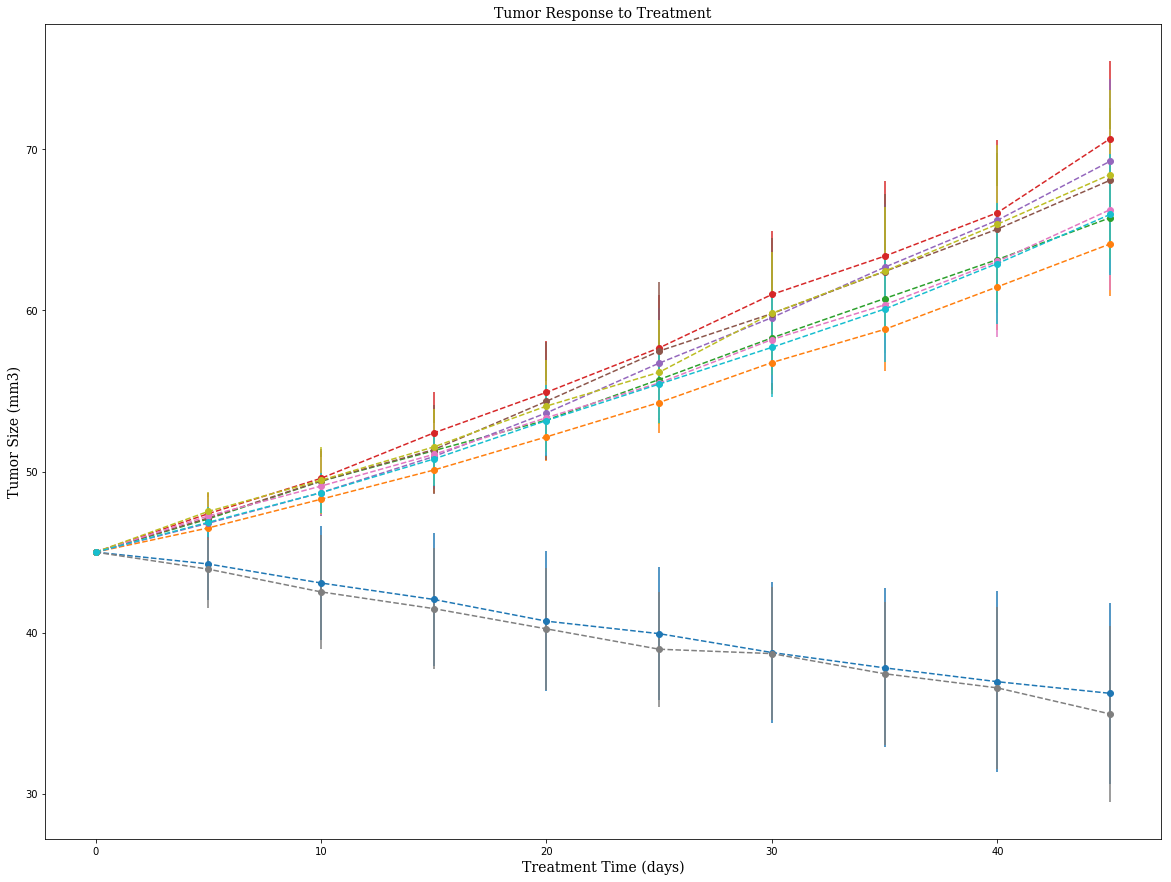

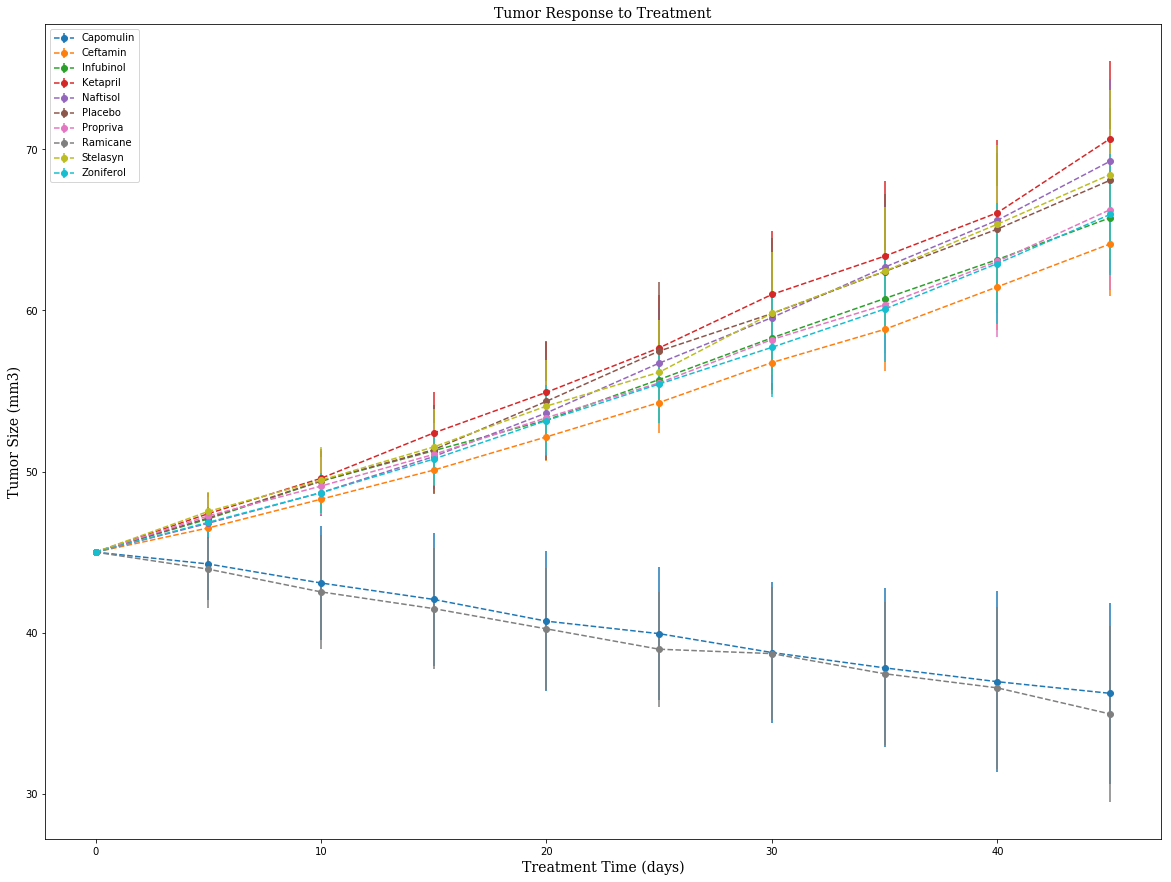

In [27]:
plt.figure(figsize=(20,15))
for i in range(len(tumorsize_cols)):
    capplot=plt.errorbar(tumorsize.index,tumorsize[tumorsize_cols[i]],stdtumorsize[tumorsize_cols[i]],xerr=None,fmt='--o')
plt.title("Tumor Response to Treatment",fontdict=font)
plt.xlabel("Treatment Time (days)",fontdict=font)
plt.ylabel("Tumor Size (mm3)",fontdict=font)
plt.legend(loc="upper left")
plt.show()

### MetaStatic Sites Over Time

In [15]:
mouse_trial_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [16]:
metasites=mouse_trial_df["Metastatic Sites"].groupby([mouse_trial_df["Timepoint"],mouse_trial_df["Drug"]]).count().unstack()
metasites_cols=list(metasites.columns)
metasites

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [17]:
stdmetasites=mouse_trial_df["Metastatic Sites"].groupby([mouse_trial_df["Timepoint"],mouse_trial_df["Drug"]]).std().unstack()
stdmetasites

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.374166,0.497613,0.458258,0.470472,0.448978,0.494535,0.476095,0.331662,0.435890,0.380693
10,0.627163,0.680557,0.730297,0.666125,0.749603,0.564660,0.506870,0.442326,0.593109,0.511766
15,0.646899,0.787327,0.889087,0.834210,0.727029,0.850696,0.562296,0.564660,0.735868,0.511766
20,0.775107,1.022620,1.050063,1.031662,0.812728,1.020263,0.707107,0.572768,0.920662,0.685994
25,0.852803,1.098127,1.127494,1.256562,0.785905,1.088037,0.744946,0.572768,0.958190,0.946485
30,0.811177,0.997914,0.939336,1.474179,1.032796,1.162919,0.960769,0.671262,0.978528,0.961150
35,0.795006,0.997249,0.778499,1.490164,1.279881,1.277446,1.159502,0.669043,0.963933,1.069045
40,0.804748,1.081818,0.994429,1.222799,1.245946,1.029857,1.301708,0.718185,1.083625,1.121714


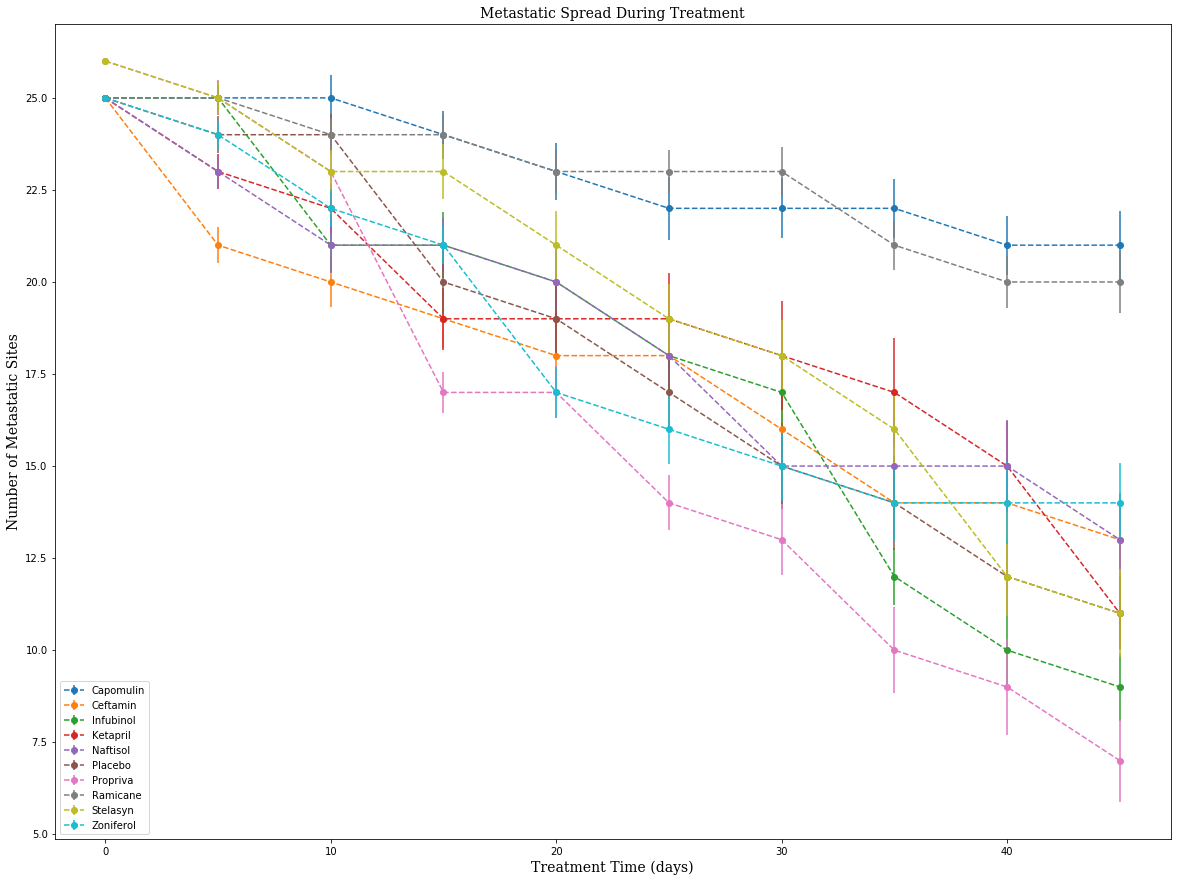

In [28]:
plt.figure(figsize=(20,15))
for i in range(len(tumorsize_cols)):
    capplot=plt.errorbar(metasites.index,metasites[metasites_cols[i]],stdmetasites[metasites_cols[i]],xerr=None,fmt='--o')
plt.title("Metastatic Spread During Treatment",fontdict=font)
plt.xlabel("Treatment Time (days)",fontdict=font)
plt.ylabel("Number of Metastatic Sites",fontdict=font)
plt.legend(loc="lower left")
plt.show()

In [20]:
micecount=mouse_trial_df["Mouse ID"].groupby([mouse_trial_df["Timepoint"],mouse_trial_df["Drug"]]).count().unstack()
micecount
micecount_cols=list(micecount.columns)

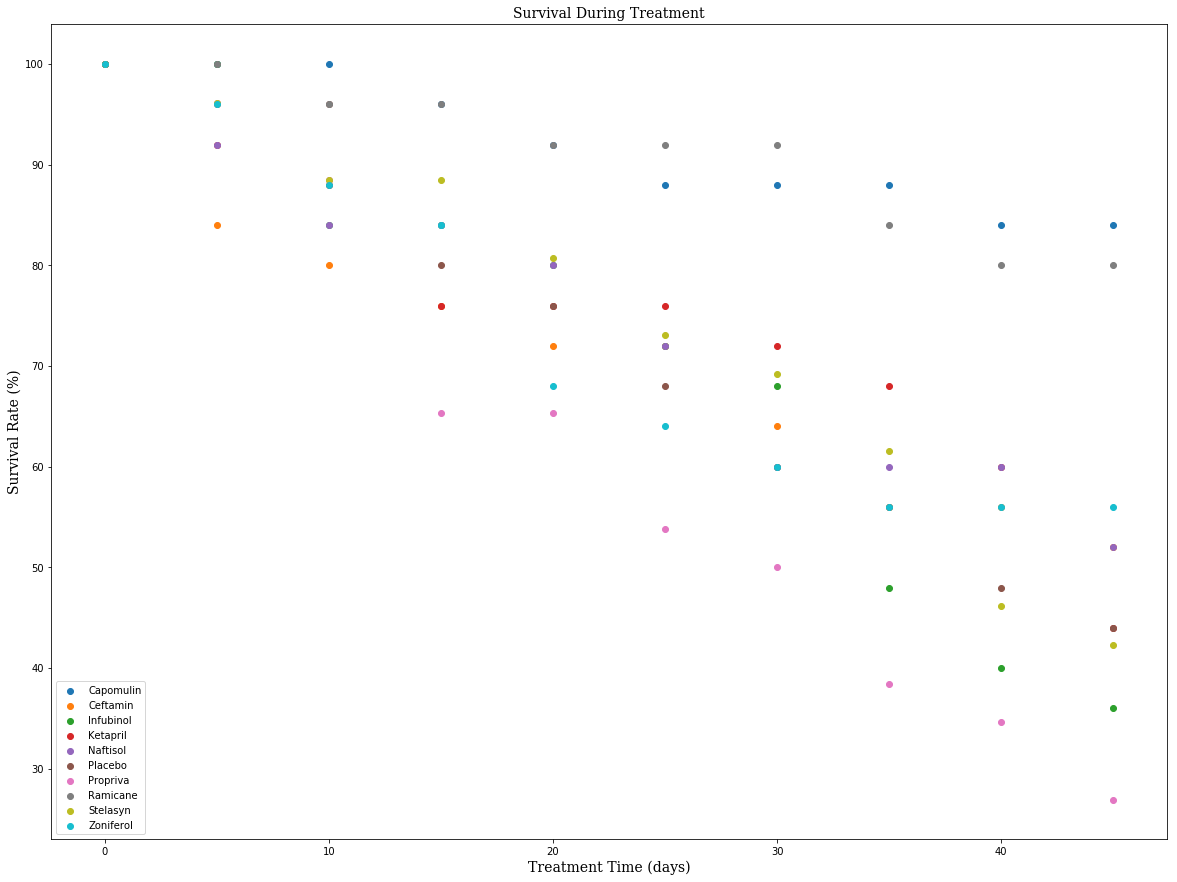

In [31]:
plt.figure(figsize=(20,15))
for i in range(len(micecount_cols)):
    capplot=plt.scatter(micecount.index,((micecount[micecount_cols[i]]/micecount[micecount_cols[i]][0])*100))
plt.title("Survival During Treatment",fontdict=font)
plt.ylabel("Survival Rate (%)",fontdict=font)
plt.xlabel("Treatment Time (days)",fontdict=font)
plt.legend(loc="lower left")
plt.show()

### Average Tumor Change Over Treatment Time

In [32]:
mouse_trial_df.head()
tumorsize

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


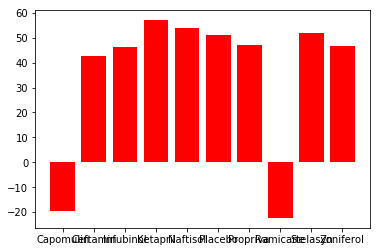

In [65]:
#Average tumor size at 0 compared to avg tumorsize at day 45-- Size(45)-Size(0)/Size(0)
tumor_change=[]
lstindex=tumorsize.index[len(tumorsize.index)-1]
fstindex=tumorsize.index[0]

for i in range(len(tumorsize_cols)):
    tumor_change.append(((tumorsize[tumorsize_cols[i]][lstindex]-tumorsize[tumorsize_cols[i]][fstindex])/tumorsize[tumorsize_cols[i]][fstindex])*100)
tumor_change

for tumor in tumor_change:
    if tumor<=0:
        plt.bar(tumorsize_cols,tumor_change,color="green")
    else:
        plt.bar(tumorsize_cols,tumor_change,color="red")

plt.show()

# # plt.figure(figsize=(20,15))
# # # plt.bar(tumorsize_cols,tumor_change)
# plt.show()


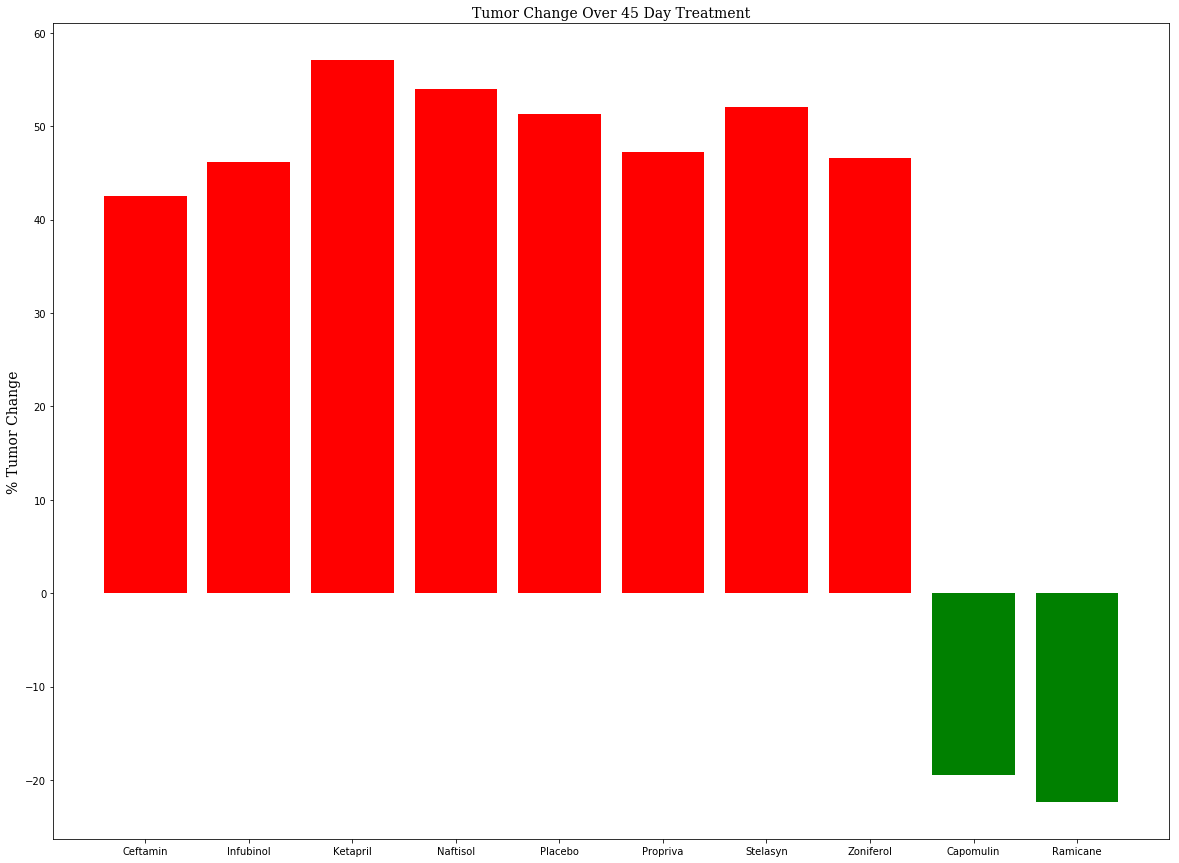

In [98]:

tumorshrink=[]
tumorgrow=[]

for tumor in tumor_change:
    if tumor<0:
        tumorshrink.append(tumor)
    else:
        tumorgrow.append(tumor)
tumorgrowindex=[tumor_change.index(tumorgrow[g]) for g in range(len(tumorgrow))]

tumorshrinkindex=[tumor_change.index(tumorshrink[s]) for s in range(len(tumorshrink))]
tumorgrowcols=[tumorsize_cols[i] for i in tumorgrowindex]
tumorshrinkcols=[tumorsize_cols[i] for i in tumorshrinkindex]
plt.figure(figsize=(20,15))
plt.bar(tumorgrowcols,tumorgrow,color="red")
plt.bar(tumorshrinkcols,tumorshrink,color="green")
plt.title("Tumor Change Over 45 Day Treatment",fontdict=font)
plt.ylabel("% Tumor Change",fontdict=font)

plt.show()